In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
data = pd.read_csv('train.csv', sep = ',')
test = pd.read_csv('test.csv')

In [60]:
data.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [61]:
train = data

In [62]:
train.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [63]:
train.drop(['ID', 'Username'], axis = 1, inplace = True)
test.drop(['ID','Username'], axis = 1, inplace= True)

In [64]:
test

,Tag,Reputation,Answers,Views
0,a,5645.0,3.0,33200.0
1,c,24511.0,6.0,2730.0
2,i,927.0,1.0,21167.0
3,i,21.0,6.0,18528.0
4,i,4475.0,10.0,57240.0
...,...,...,...,...
141443,j,4681.0,4.0,2469.0
141444,j,7782.0,3.0,18998.0
141445,p,435.0,5.0,57048.0
141446,o,176.0,3.0,10193.0


In [65]:
dummy_var1 = pd.get_dummies(train['Tag'])
dummy_var2 = pd.get_dummies(test['Tag'])

In [66]:
dummy_var2

,a,c,h,i,j,o,p,r,s,x
0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
141443,0,0,0,0,1,0,0,0,0,0
141444,0,0,0,0,1,0,0,0,0,0
141445,0,0,0,0,0,0,1,0,0,0
141446,0,0,0,0,0,1,0,0,0,0


In [67]:
train = pd.concat([train, dummy_var1], axis = 1)
test = pd.concat([test, dummy_var2], axis = 1)

train.drop('Tag', axis = 1, inplace = True)
test.drop('Tag', axis = 1, inplace = True)

In [68]:
train

,Reputation,Answers,Views,Upvotes,a,c,h,i,j,o,p,r,s,x
0,3942.0,2.0,7855.0,42.0,1,0,0,0,0,0,0,0,0,0
1,26046.0,12.0,55801.0,1175.0,1,0,0,0,0,0,0,0,0,0
2,1358.0,4.0,8067.0,60.0,0,1,0,0,0,0,0,0,0,0
3,264.0,3.0,27064.0,9.0,1,0,0,0,0,0,0,0,0,0
4,4271.0,4.0,13986.0,83.0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330040,36.0,2.0,1063.0,0.0,0,1,0,0,0,0,0,0,0,0
330041,1649.0,2.0,23319.0,73.0,0,1,0,0,0,0,0,0,0,0
330042,6178.0,2.0,2453.0,15.0,0,1,0,0,0,0,0,0,0,0
330043,89.0,2.0,2107.0,3.0,0,0,0,0,1,0,0,0,0,0


In [69]:
test

,Reputation,Answers,Views,a,c,h,i,j,o,p,r,s,x
0,5645.0,3.0,33200.0,1,0,0,0,0,0,0,0,0,0
1,24511.0,6.0,2730.0,0,1,0,0,0,0,0,0,0,0
2,927.0,1.0,21167.0,0,0,0,1,0,0,0,0,0,0
3,21.0,6.0,18528.0,0,0,0,1,0,0,0,0,0,0
4,4475.0,10.0,57240.0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
141443,4681.0,4.0,2469.0,0,0,0,0,1,0,0,0,0,0
141444,7782.0,3.0,18998.0,0,0,0,0,1,0,0,0,0,0
141445,435.0,5.0,57048.0,0,0,0,0,0,0,1,0,0,0
141446,176.0,3.0,10193.0,0,0,0,0,0,1,0,0,0,0


In [70]:
train.describe()

,Reputation,Answers,Views,Upvotes,a,c,h,i,j,o,p,r,s,x
count,3.300450e+05,330045.000000,3.300450e+05,330045.000000,330045.000000,330045.000000,330045.000000,330045.000000,330045.000000,330045.000000,330045.000000,330045.000000,330045.000000,330045.000000
mean,7.773147e+03,3.917672,2.964507e+04,337.505358,0.096032,0.219540,0.062307,0.098168,0.218855,0.044073,0.131518,0.037698,0.070666,0.021143
std,2.706141e+04,3.579515,8.095646e+04,3592.441135,0.294636,0.413935,0.241712,0.297543,0.413471,0.205257,0.337967,0.190465,0.256267,0.143860
min,0.000000e+00,0.000000,9.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.820000e+02,2.000000,2.594000e+03,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.236000e+03,3.000000,8.954000e+03,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.118000e+03,5.000000,2.687000e+04,107.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.042428e+06,76.000000,5.231058e+06,615278.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
train.isnull().sum()

Reputation    0
Answers       0
Views         0
Upvotes       0
a             0
c             0
h             0
i             0
j             0
o             0
p             0
r             0
s             0
x             0
dtype: int64

### Making Scatter Plots

Text(0, 0.5, 'Upvotes')

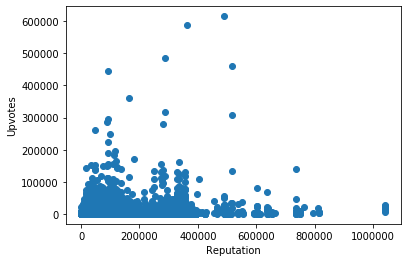

In [72]:
plt.scatter(x = train.Reputation, y = train.Upvotes)
plt.xlabel('Reputation')
plt.ylabel('Upvotes')

Text(0, 0.5, 'Upvotes')

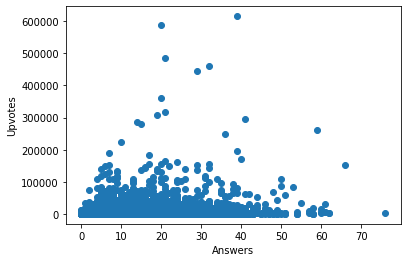

In [74]:
plt.scatter(x = train.Answers, y = train.Upvotes)
plt.xlabel('Answers')
plt.ylabel('Upvotes')

Text(0, 0.5, 'Upvotes')

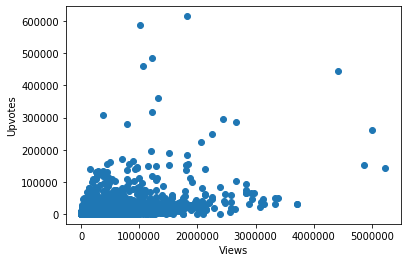

In [75]:
plt.scatter(x = train.Views, y = train.Upvotes)
plt.xlabel('Views')
plt.ylabel('Upvotes')

In [76]:
train.drop(train[train['Views'] > 4000000].index, inplace=True)

In [78]:
train

,Reputation,Answers,Views,Upvotes,a,c,h,i,j,o,p,r,s,x
0,3942.0,2.0,7855.0,42.0,1,0,0,0,0,0,0,0,0,0
1,26046.0,12.0,55801.0,1175.0,1,0,0,0,0,0,0,0,0,0
2,1358.0,4.0,8067.0,60.0,0,1,0,0,0,0,0,0,0,0
3,264.0,3.0,27064.0,9.0,1,0,0,0,0,0,0,0,0,0
4,4271.0,4.0,13986.0,83.0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330040,36.0,2.0,1063.0,0.0,0,1,0,0,0,0,0,0,0,0
330041,1649.0,2.0,23319.0,73.0,0,1,0,0,0,0,0,0,0,0
330042,6178.0,2.0,2453.0,15.0,0,1,0,0,0,0,0,0,0,0
330043,89.0,2.0,2107.0,3.0,0,0,0,0,1,0,0,0,0,0


## Normalizing the data

In [79]:
train['Reputation'] = train['Reputation']/train['Reputation'].max()
train['Answers'] = train['Answers']/train['Answers'].max()
train['Views'] = train['Views']/train['Views'].max()

test['Reputation'] = test['Reputation']/test['Reputation'].max()
test['Answers'] = test['Answers']/test['Answers'].max()
test['Views'] = test['Views']/test['Views'].max()

In [80]:
y = train.iloc[:,3].values

In [81]:
train.drop('Upvotes', axis = 1, inplace = True)

In [82]:
X = train.iloc[:,:].values

In [83]:
X.shape

(330041, 13)

In [84]:
test = test.iloc[:,:].values

## Building the Model

In [85]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
regressor = RandomForestRegressor()

In [88]:
regressor.fit(X, y)

KeyboardInterrupt: 

In [126]:
y_predct = regressor.predict(test)

In [90]:
from sklearn.model_selection import GridSearchCV

### Grid Search for Hyperparameter tuning

In [93]:
regressor = RandomForestRegressor()

In [92]:
param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }



In [94]:
grid = GridSearchCV(regressor, param_grid, n_jobs=-1, cv=5)

In [95]:
    grid.fit(X,y)


KeyboardInterrupt: 

In [25]:
from sklearn.model_selection import RandomizedSearchCV

rf_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
rf_random.fit(X, y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [92]:
test2 = pd.read_csv('test.csv')

In [133]:
answer = pd.DataFrame({'ID': test2.iloc[:,0], 'Upvotes': y_predct[:]})
answer = answer.astype(int)

In [134]:
answer

,ID,Upvotes
0,366953,230
1,71864,78
2,141692,36
3,316833,10
4,440445,309
...,...,...
141443,47187,27
141444,329126,189
141445,282334,86
141446,386629,22


In [135]:
answer.to_csv('results.csv',index=False)